In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from FCI_functions import calculate_post_score, calculate_pre_score, calculate_question_score_post, calculate_question_score_pre, calculate_pre_score_2020, calculate_post_score_2020, calculate_pre_score_2021, calculate_post_score_2021

In [3]:
df21_111 = pd.read_excel('rawdata/2021-22 WT1 Phys 111 ALL Data - Shared with Maya (2022-03-03).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)

In [4]:
df1 = df21_111.replace({'PRE Q2' : 4}, {'PRE Q2': 1})

df2 = df1.replace({'PRE Q2' : 5}, {'PRE Q2': 2})

df3 = df2.replace({'PRE Q2' : 6}, {'PRE Q2': 3})

df4 = df3.replace({'PRE Q38' : 6}, {'PRE Q38' : 5})

df5 = df4.replace({'POST Q32' : 6}, {'POST Q32' :4})
df6 = df5.replace({'POST Q32' : 7}, {'POST Q32' :5})

df21_111 = df6.replace({'POST Q49' : 6}, {'POST Q49' :5})

df21_111

,Session,Course,Lecture,Secondary Section,Tertiary Section,Percent Grade,Letter Grade,PRE Q1,PRE Q2,PRE Q3,...,POST Q54,POST Q55,POST Q56,POST Q57,POST Q58,POST Q59,POST Q60,POST Q61,POST Q62,POST Q63
0,2021W,111,1,L03,T03,90,A+,3.0,3.0,2.0,...,5.0,2.0,2.0,1.0,1.0,5.0,1.0,5.0,2.0,3.0
1,2021W,111,1,L16,XM2,80,A-,3.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021W,111,1,L01,XM2,45,F,3.0,3.0,2.0,...,5.0,2.0,2.0,1.0,3.0,5.0,1.0,4.0,2.0,5.0
3,2021W,111,1,L12,T07,93,A+,2.0,2.0,2.0,...,2.0,2.0,3.0,1.0,3.0,2.0,3.0,5.0,2.0,3.0
4,2021W,111,1,L09,XM2,87,A,NaN,NaN,NaN,...,3.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2021W,111,1,L10,XM2,81,A-,3.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,2021W,111,1,L09,XM2,83,A-,3.0,2.0,2.0,...,2.0,4.0,4.0,4.0,4.0,2.0,1.0,3.0,5.0,2.0
263,2021W,111,1,L06,T04,91,A+,3.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,2021W,111,1,L16,T03,78,B+,3.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df21_111.to_excel('2021raw_corrected.xlsx')

In [6]:
def calculate_pre_score_2021(student):
    corr_ans = [3,1,3,5,2,2,2,2,5,1,4,2,4,4,1,1,2,2,5,4,5,2,2,1,3,5,3,5,2,3]
    pre = []         
    for i in range (1, 30):
        string = "PRE Q" + str(i)
        pre.append(string)
    score = 0
    for i in range(1,30):
            if student[pre[i-1]]==corr_ans[i-1]:
                score+=1
            
    return (score)

In [7]:
calculate_pre_score_2021(df21_111.iloc[32])

6

In [8]:
pre = []
    for i in range (1,31):
        string = "PRE Q" + str(i)
        pre.append(string)
    post = []
    for i in range (1,31):
        string = "POST Q" + str(i)
        post.append(string)

    pre_2020 = ['PRE Q1'] 
    for i in range (24, 53):
        string = 'PRE Q' + str(i)
        pre_2020.append(string)

    post_2020 = ['POST Q1'] 
    for i in range (35, 64):
        string = 'POST Q' + str(i)
        post_2020.append(string)

IndentationError: unexpected indent (<ipython-input-8-f5151a96ac12>, line 2)

In [9]:
def by_gender_by_year_2021(df, name):
    
    avg_grade = df["Percent Grade"].mean()
    avg_grade_error = df['Percent Grade'].sem()
    
    pre = []
    for i in range (1,31):
        string = "PRE Q" + str(i)
        pre.append(string)
    post = []
    for i in range (1,31):
        string = "POST Q" + str(i)
        post.append(string)

    pre_2020 = ['PRE Q1'] 
    for i in range (24, 53):
        string = 'PRE Q' + str(i)
        pre_2020.append(string)

    post_2020 = ['POST Q1'] 
    for i in range (35, 64):
        string = 'POST Q' + str(i)
        post_2020.append(string)

    is_f = df['PRE Q12']== 1
    df_f = df[is_f]
    
    avg_grade_f = df_f['Percent Grade'].mean()
    avg_grade_f_error = df_f['Percent Grade'].sem()
    
    df_pre_f = df_f[pre_2020]
    df_post_f = df_f[post_2020]

    df_pre_f.columns = pre
    df_post_f.columns = post
    
    df_pre_f = df_pre_f.dropna(thresh=25, axis=0)
    df_post_f = df_post_f.dropna(thresh=25, axis=0)
    
    idx = df_pre_f.index.intersection(df_post_f.index)
    
    df_pre_f = df_pre_f.loc[idx]
    df_post_f = df_post_f.loc[idx]
    num_f = len(idx)

    pre_f = df_pre_f.apply(calculate_pre_score_2021, axis=1).mean()
    pre_f_error = df_pre_f.apply(calculate_pre_score_2021, axis=1).sem(axis=0)
    post_f =df_post_f.apply(calculate_post_score_2021, axis=1).mean()
    post_f_error = df_post_f.apply(calculate_post_score_2021, axis=1).sem(axis=0)
    gain_f = (df_pre_f.apply(calculate_pre_score_2021, axis=1) - df_post_f.apply(calculate_post_score_2021, axis=1)).mean()
    norm_f = (post_f-pre_f)/(30-pre_f)
    norm_gain_error = (((df_pre_f.apply(calculate_pre_score_2021, axis=1) - df_post_f.apply(calculate_post_score_2021, axis=1)))/(30-(df_pre_f.apply(calculate_pre_score_2021, axis=1)))).sem(axis=0)
    gain_f_error = (df_pre_f.apply(calculate_pre_score_2021, axis=1) - df_post_f.apply(calculate_post_score_2021, axis=1)).sem(axis=0)
    gain_f_error_1 = np.sqrt(pre_f_error**2 + post_f_error**2)

    is_m = df['PRE Q12']== 3
    df_m = df[is_m]
    
    avg_grade_m = df_m['Percent Grade'].mean()
    avg_grade_m_error = df_m['Percent Grade'].sem()
    
    df_pre_m = df_m[pre_2020]
    df_post_m = df_m[post_2020]

    df_pre_m.columns = pre
    df_post_m.columns = post
    
    df_pre_m = df_pre_m.dropna(thresh=25, axis=0)
    df_post_m = df_post_m.dropna(thresh=25, axis=0)
    
    idx = df_pre_m.index.intersection(df_post_m.index)
    
    df_pre_m = df_pre_m.loc[idx]
    df_post_m = df_post_m.loc[idx]
    num_m = len(idx)

    pre_m = df_pre_m.apply(calculate_pre_score_2021, axis=1).mean()
    pre_m_error = df_pre_m.apply(calculate_pre_score_2021, axis=1).sem(axis=0)
    post_m =df_post_m.apply(calculate_post_score_2021, axis=1).mean()
    post_m_error = df_post_m.apply(calculate_post_score_2021, axis=1).sem(axis=0)
    gain_m = (df_pre_m.apply(calculate_pre_score_2021, axis=1) - df_post_m.apply(calculate_post_score_2021, axis=1)).mean()
    norm_m = (post_m-pre_m)/(30-pre_m)
    norm_m_error = (((df_pre_m.apply(calculate_pre_score_2021, axis=1) - df_post_m.apply(calculate_post_score_2021, axis=1)))/(30-(df_pre_m.apply(calculate_pre_score_2021, axis=1)))).sem(axis=0)
    gain_m_error = (df_pre_m.apply(calculate_pre_score_2021, axis=1) - df_post_m.apply(calculate_post_score_2021, axis=1)).sem(axis=0)
    gain_m_error_1 = np.sqrt(pre_m_error**2 + post_m_error**2)

    array = [name, avg_grade, avg_grade_error, pre_f, pre_f_error, post_f, post_f_error, post_f-pre_f, norm_f, norm_gain_error, gain_f_error, gain_f_error_1, num_f, avg_grade_f, avg_grade_f_error, pre_m, pre_m_error, post_m, post_m_error, post_m-pre_m, norm_m, norm_m_error, gain_m_error, gain_m_error_1, num_m, avg_grade_m, avg_grade_m_error]
    return array

In [10]:
by_gender_by_year_2021(df21_111, "2021 All")

no_post = df21_111['POST Q11'].isnull()
df_nopost = df21_111[no_post]

by_gender_by_year_2021(df_nopost, "No Post Test 2021")

['No Post Test 2021',
 73.92105263157895,
 1.38476779871726,
 PRE Q1    NaN
 PRE Q2    NaN
 PRE Q3    NaN
 PRE Q4    NaN
 PRE Q5    NaN
 PRE Q6    NaN
 PRE Q7    NaN
 PRE Q8    NaN
 PRE Q9    NaN
 PRE Q10   NaN
 PRE Q11   NaN
 PRE Q12   NaN
 PRE Q13   NaN
 PRE Q14   NaN
 PRE Q15   NaN
 PRE Q16   NaN
 PRE Q17   NaN
 PRE Q18   NaN
 PRE Q19   NaN
 PRE Q20   NaN
 PRE Q21   NaN
 PRE Q22   NaN
 PRE Q23   NaN
 PRE Q24   NaN
 PRE Q25   NaN
 PRE Q26   NaN
 PRE Q27   NaN
 PRE Q28   NaN
 PRE Q29   NaN
 PRE Q30   NaN
 dtype: float64,
 PRE Q1    NaN
 PRE Q2    NaN
 PRE Q3    NaN
 PRE Q4    NaN
 PRE Q5    NaN
 PRE Q6    NaN
 PRE Q7    NaN
 PRE Q8    NaN
 PRE Q9    NaN
 PRE Q10   NaN
 PRE Q11   NaN
 PRE Q12   NaN
 PRE Q13   NaN
 PRE Q14   NaN
 PRE Q15   NaN
 PRE Q16   NaN
 PRE Q17   NaN
 PRE Q18   NaN
 PRE Q19   NaN
 PRE Q20   NaN
 PRE Q21   NaN
 PRE Q22   NaN
 PRE Q23   NaN
 PRE Q24   NaN
 PRE Q25   NaN
 PRE Q26   NaN
 PRE Q27   NaN
 PRE Q28   NaN
 PRE Q29   NaN
 PRE Q30   NaN
 dtype: float64,
 POST

In [11]:
pre = []
for i in range (1,31):
    string = "PRE Q" + str(i)
    pre.append(string)
post = []
for i in range (1,31):
    string = "POST Q" + str(i)
    post.append(string)

pre_2020 = ['PRE Q1'] 
for i in range (24, 53):
    string = 'PRE Q' + str(i)
    pre_2020.append(string)

post_2020 = ['POST Q1'] 
for i in range (35, 64):
    string = 'POST Q' + str(i)
    post_2020.append(string)

is_f = df21_111['PRE Q12']== 1
df_f = df21_111[is_f]

avg_grade_f = df_f['Percent Grade'].mean()
print(avg_grade_f)
avg_grade_f_error = df_f['Percent Grade'].sem()

df_pre_f = df_f[pre_2020]
df_post_f = df_f[post_2020]

df_pre_f.columns = pre
df_post_f.columns = post

df_pre_f = df_pre_f.dropna(thresh=25, axis=0)
df_post_f = df_post_f.dropna(thresh=25, axis=0)

idx = df_pre_f.index.intersection(df_post_f.index)

df_pre_f = df_pre_f.loc[idx]
df_post_f = df_post_f.loc[idx]
num_f = len(idx)

pre_f = df_pre_f.apply(calculate_pre_score_2021, axis=1).mean()
print(pre_f)
pre_f_error = df_pre_f.apply(calculate_pre_score_2021, axis=1).sem(axis=0)
post_f =df_post_f.apply(calculate_post_score_2021, axis=1).mean()
print(post_f)
post_f_error = df_post_f.apply(calculate_post_score_2021, axis=1).sem(axis=0)
gain_f = (df_pre_f.apply(calculate_pre_score_2021, axis=1) - df_post_f.apply(calculate_post_score_2021, axis=1)).mean()
norm_f = (post_f-pre_f)/(30-pre_f)
print(norm_f)
norm_gain_error = (((df_pre_f.apply(calculate_pre_score_2021, axis=1) - df_post_f.apply(calculate_post_score_2021, axis=1)))/(30-(df_pre_f.apply(calculate_pre_score_2021, axis=1)))).sem(axis=0)
gain_f_error = (df_pre_f.apply(calculate_pre_score_2021, axis=1) - df_post_f.apply(calculate_post_score_2021, axis=1)).sem(axis=0)
gain_f_error_1 = np.sqrt(pre_f_error**2 + post_f_error**2)


79.35714285714286
11.022727272727273
12.931818181818182
0.10059880239520955


In [12]:
column_names=["YEAR", "Avg Grade", "Avg Grade Error", "Pre Score F", "Pre Score F Error", "Post Score F","Post Score F Error", "Gain F", "Norm Gain", "Norm Gain Error", "Gain Error sqrt","Gain Error", "Num F", "Avg Grade F", "Avg Grade F error", "Pre Score M", "Pre Score M Error", "Post Score M", "Post Score M Error", "Gain M", "Norm gain M", "Norm gain error", "Gain M Error", "Gain M error sqrt", "Num M", "Avg M Grade", "Avg M grade error"]
df  = pd.DataFrame(columns=column_names)
df.loc[1] = by_gender_by_year_2021(df21_111, "2021 111")
df
#df.transpose()

column_names=["YEAR", "Avg Grade", "Avg Grade Error", "Pre Score F", "Pre Score F Error", "Post Score F","Post Score F Error", "Gain F", "Norm Gain", "Norm Gain Error", "Gain Error sqrt","Gain Error", "Num F", "Avg Grade F", "Avg Grade F error", "Pre Score M", "Pre Score M Error", "Post Score M", "Post Score M Error", "Gain M", "Norm gain M", "Norm gain error", "Gain M Error", "Gain M error sqrt", "Num M", "Avg M Grade", "Avg M grade error"]
df4  = pd.DataFrame(columns=column_names)
df4.loc[1] = by_gender_by_year_2021(df21_111, "2021 111")
df4


,YEAR,Avg Grade,Avg Grade Error,Pre Score F,Pre Score F Error,Post Score F,Post Score F Error,Gain F,Norm Gain,Norm Gain Error,...,Post Score M,Post Score M Error,Gain M,Norm gain M,Norm gain error,Gain M Error,Gain M error sqrt,Num M,Avg M Grade,Avg M grade error
1,2021 111,79.18797,0.835944,11.022727,1.018065,12.931818,1.066696,1.909091,0.100599,0.163212,...,18.021978,0.795896,1.835165,0.132856,0.174822,0.791787,1.076771,91,78.80117,1.143072


In [13]:
#dftut2021_gr12 = pd.DataFrame(columns = [0, 1, 2, 3])

is_notut = df21_111['Tertiary Section']== 'XM2'
df_notut = df21_111[is_notut]
#dftut2021_gr12.loc['No tutorial'] = df_notut["PRE Q2"].value_counts()

is_tut = df21_111['Tertiary Section'] != 'XM2'
df_tut = df21_111[is_tut]
#dftut2021_gr12.loc['In tutorial'] = df_tut["PRE Q2"].value_counts()

df.loc[2] = by_gender_by_year_2021(df_tut, "2021 111 tutorial")

df.loc[3] = by_gender_by_year_2021(df_notut, "2021 111 no tutorial")

df.to_excel('2021.xlsx')

#dftut2021_gr12.columns = ['?', '0', '1', '2+']

#df

df_tut


,Session,Course,Lecture,Secondary Section,Tertiary Section,Percent Grade,Letter Grade,PRE Q1,PRE Q2,PRE Q3,...,POST Q54,POST Q55,POST Q56,POST Q57,POST Q58,POST Q59,POST Q60,POST Q61,POST Q62,POST Q63
0,2021W,111,1,L03,T03,90,A+,3.0,3.0,2.0,...,5.0,2.0,2.0,1.0,1.0,5.0,1.0,5.0,2.0,3.0
3,2021W,111,1,L12,T07,93,A+,2.0,2.0,2.0,...,2.0,2.0,3.0,1.0,3.0,2.0,3.0,5.0,2.0,3.0
5,2021W,111,1,L13,T06,39,F,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021W,111,1,L10,T01,77,B+,3.0,3.0,2.0,...,3.0,2.0,2.0,1.0,4.0,5.0,3.0,5.0,2.0,3.0
8,2021W,111,1,L02,T03,77,B+,3.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2021W,111,1,L05,T02,87,A,3.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,2021W,111,1,L03,T03,81,A-,4.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,2021W,111,1,L06,T04,91,A+,3.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,2021W,111,1,L16,T03,78,B+,3.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
is_gr12_tut = df_tut['PRE Q6']!=2
df_isgr12_tut = df_tut[is_gr12_tut]

is_gr12_notut = df_notut['PRE Q6']!=2
df_isgr12_notut = df_notut[is_gr12_notut]

print("tutorial")
print(df_tut['PRE Q6'].value_counts(dropna=False))
print("no tutorial")
print(df_notut['PRE Q6'].value_counts(dropna=False))
print("all")
print(df21_111["PRE Q6"].value_counts(dropna=False))

print("Pre")
print(df_isgr12_notut['POST Q56'].value_counts(dropna=False))
print("post")
print(df_isgr12_notut['PRE Q1'].value_counts(dropna=False))

is_gr12_notut_f = df_isgr12_notut['PRE Q12']==1
df_isgr12_notut_f = df_isgr12_notut[is_gr12_notut_f]

is_gr12_notut_m = df_isgr12_notut['PRE Q12']==2
df_isgr12_notut_m = df_isgr12_notut[is_gr12_notut_m]

df_isgr12_tut

tutorial
2.0    120
1.0     21
0.0      8
NaN      7
Name: PRE Q6, dtype: int64
no tutorial
2.0    85
1.0    17
NaN     4
0.0     4
Name: PRE Q6, dtype: int64
all
2.0    205
1.0     38
0.0     12
NaN     11
Name: PRE Q6, dtype: int64
Pre
NaN    8
2.0    7
3.0    5
0.0    2
1.0    2
4.0    1
Name: POST Q56, dtype: int64
post
3.0    14
2.0     5
NaN     4
1.0     1
4.0     1
Name: PRE Q1, dtype: int64


,Session,Course,Lecture,Secondary Section,Tertiary Section,Percent Grade,Letter Grade,PRE Q1,PRE Q2,PRE Q3,...,POST Q54,POST Q55,POST Q56,POST Q57,POST Q58,POST Q59,POST Q60,POST Q61,POST Q62,POST Q63
8,2021W,111,1,L02,T03,77,B+,3.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2021W,111,1,L02,T07,80,A-,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,2021W,111,1,L09,T04,73,B,NaN,NaN,NaN,...,1.0,4.0,3.0,4.0,1.0,3.0,4.0,3.0,3.0,5.0
38,2021W,111,1,L11,T01,68,B-,3.0,2.0,2.0,...,5.0,2.0,2.0,1.0,4.0,2.0,3.0,5.0,4.0,5.0
41,2021W,111,1,L05,T02,95,A+,3.0,3.0,2.0,...,4.0,2.0,3.0,3.0,3.0,5.0,2.0,5.0,2.0,3.0
44,2021W,111,1,L01,T04,78,B+,5.0,2.0,2.0,...,5.0,4.0,2.0,1.0,5.0,4.0,3.0,3.0,2.0,5.0
62,2021W,111,1,L07,T02,84,A-,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,2021W,111,1,L16,T04,78,B+,3.0,3.0,2.0,...,1.0,2.0,3.0,1.0,5.0,5.0,1.0,5.0,2.0,2.0
81,2021W,111,1,L10,T02,82,A-,3.0,3.0,2.0,...,5.0,1.0,2.0,2.0,4.0,2.0,2.0,4.0,4.0,3.0
91,2021W,111,1,L01,T03,74,B,3.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
by_gender_by_year_2021(df_isgr12_notut, "With Grade 12 in Tutorial")
#by_gender_by_year_2021(df_isgr12_notut, "With Grade 12 not in Tutorial")

['With Grade 12 in Tutorial',
 82.84,
 1.4693309134886305,
 13.2,
 3.0066592756745814,
 12.2,
 2.817800560721074,
 -1.0,
 -0.05952380952380952,
 0.036181555221847565,
 0.5477225575051661,
 4.120679555607302,
 5,
 83.42857142857143,
 2.974952123321385,
 9.142857142857142,
 2.0979419782772086,
 10.857142857142858,
 2.3546162504906887,
 1.7142857142857153,
 0.08219178082191786,
 0.20461274005865243,
 3.4827075244241046,
 3.153661083771133,
 7,
 82.9,
 2.4149994248906608]

In [16]:
is_notut_postdrop = post_dropped['Tertiary Section']== 'XM2'
df_notut_postdrop = post_dropped[is_notut_postdrop]
#dftut2021_gr12.loc['No tutorial'] = df_notut["PRE Q2"].value_counts()

is_tut_postdrop = post_dropped['Tertiary Section'] != 'XM2'
df_tut_postdrop = post_dropped[is_tut_postdrop]
#dftut2021_gr12.loc['In tutorial'] = df_tut["PRE Q2"].value_counts()

#df4.loc[2] = by_gender_by_year_2021(df_tut_postdrop, "2021 111 tutorial")

#df4.loc[3] = by_gender_by_year_2021(df_notut_postdrop, "2021 111 no tutorial")

#df.to_excel('2021.xlsx')

#dftut2021_gr12.columns = ['?', '0', '1', '2+']

#df4

df_notut_postdrop

NameError: name 'post_dropped' is not defined

In [17]:
def tutorial_split(df, year):
    is_notut = df['Tertiary Section']== 'XM2'
    df_notut = df[is_notut]
    
    is_tut = df['Tertiary Section'] != 'XM2'
    df_tut = df[is_tut]
    
    column_names=["YEAR", "Avg Grade", "Avg Grade Error", "Pre Score F", "Pre Score F Error", "Post Score F","Post Score F Error", "Gain F", "Norm Gain", "Norm Gain Error", "Gain Error sqrt","Gain Error", "Num F", "Avg Grade F", "Avg Grade F error", "Pre Score M", "Pre Score M Error", "Post Score M", "Post Score M Error", "Gain M", "Norm gain M", "Norm gain error", "Gain M Error", "Gain M error sqrt", "Num M", "Avg M Grade", "Avg M grade error"]
    dfb  = pd.DataFrame(columns=column_names)
    
    dfb.loc[1] = by_gender_by_year_2021(df, year)
    dfb.loc[2] = by_gender_by_year_2021(df_tut, year + "tutorial")
    dfb.loc[3] = by_gender_by_year_2021(df_notut, year + "no tutorial")
    
    return dfb

In [18]:
tutorial_split(df21_111, "2021")

,YEAR,Avg Grade,Avg Grade Error,Pre Score F,Pre Score F Error,Post Score F,Post Score F Error,Gain F,Norm Gain,Norm Gain Error,...,Post Score M,Post Score M Error,Gain M,Norm gain M,Norm gain error,Gain M Error,Gain M error sqrt,Num M,Avg M Grade,Avg M grade error
1,2021,79.187970,0.835944,11.022727,1.018065,12.931818,1.066696,1.909091,0.100599,0.163212,...,18.021978,0.795896,1.835165,0.132856,0.174822,0.791787,1.076771,91,78.801170,1.143072
2,2021tutorial,78.801282,1.048076,8.384615,1.077143,12.307692,1.218788,3.923077,0.181495,0.044477,...,18.408163,1.047315,1.877551,0.139394,0.284968,0.931147,1.416923,49,78.867347,1.449162
3,2021no tutorial,79.736364,1.374174,14.833333,1.580622,13.833333,1.949107,-1.000000,-0.065934,0.386012,...,17.571429,1.226944,1.785714,0.125628,0.185189,1.340660,1.660037,42,78.712329,1.851557


In [19]:
def by_year_2021(df, name):
    
    avg_grade = df["Percent Grade"].mean()
    avg_grade_error = df['Percent Grade'].sem()
    
    pre = []
    for i in range (1,31):
        string = "PRE Q" + str(i)
        pre.append(string)
    post = []
    for i in range (1,31):
        string = "POST Q" + str(i)
        post.append(string)

    pre_2020 = ['PRE Q1'] 
    for i in range (24, 53):
        string = 'PRE Q' + str(i)
        pre_2020.append(string)

    post_2020 = ['POST Q1'] 
    for i in range (35, 64):
        string = 'POST Q' + str(i)
        post_2020.append(string)

    df_f = df
    
    avg_grade_f = df_f['Percent Grade'].mean()
    avg_grade_f_error = df_f['Percent Grade'].sem()
    
    df_pre_f = df_f[pre_2020]
    df_post_f = df_f[post_2020]

    df_pre_f.columns = pre
    df_post_f.columns = post
    
    df_pre_f = df_pre_f.dropna(thresh=25, axis=0)
    df_post_f = df_post_f.dropna(thresh=25, axis=0)
    
    idx = df_pre_f.index.intersection(df_post_f.index)
    
    df_pre_f = df_pre_f.loc[idx]
    df_post_f = df_post_f.loc[idx]
    num_f = len(idx)

    pre_f = df_pre_f.apply(calculate_pre_score_2021, axis=1).mean()
    pre_f_error = df_pre_f.apply(calculate_pre_score_2021, axis=1).sem(axis=0)
    post_f =df_post_f.apply(calculate_post_score_2021, axis=1).mean()
    post_f_error = df_post_f.apply(calculate_post_score_2021, axis=1).sem(axis=0)
    gain_f = (df_pre_f.apply(calculate_pre_score_2021, axis=1) - df_post_f.apply(calculate_post_score_2021, axis=1)).mean()
    norm_f = (post_f-pre_f)/(30-pre_f)
    norm_gain_error = (((df_pre_f.apply(calculate_pre_score_2021, axis=1) - df_post_f.apply(calculate_post_score_2021, axis=1)))/(30-(df_pre_f.apply(calculate_pre_score_2021, axis=1)))).sem(axis=0)
    gain_f_error = (df_pre_f.apply(calculate_pre_score_2021, axis=1) - df_post_f.apply(calculate_post_score_2021, axis=1)).sem(axis=0)
    gain_f_error_1 = np.sqrt(pre_f_error**2 + post_f_error**2)

    array = [name, avg_grade, avg_grade_error, pre_f, pre_f_error, post_f, post_f_error, post_f-pre_f, norm_f, norm_gain_error, gain_f_error, gain_f_error_1, num_f, avg_grade_f, avg_grade_f_error]
    return array

In [20]:
by_year_2021(df21_111, "2021 All")

['2021 All',
 79.18796992481202,
 0.8359441897506774,
 14.836879432624114,
 0.6180028061725944,
 16.666666666666668,
 0.6584857723040919,
 1.8297872340425538,
 0.12067352666043035,
 0.12397561386976566,
 0.5937838624105751,
 0.9030675394255502,
 141,
 79.18796992481202,
 0.8359441897506774]

In [21]:
pre = []
for i in range (1,31):
    string = "PRE Q" + str(i)
    pre.append(string)
post = []
for i in range (1,31):
    string = "POST Q" + str(i)
    post.append(string)

pre_2020 = ['PRE Q1'] 
for i in range (24, 53):
    string = 'PRE Q' + str(i)
    pre_2020.append(string)

post_2020 = ['POST Q1'] 
for i in range (35, 64):
    string = 'POST Q' + str(i)
    post_2020.append(string)

df_pre_f = df21_111[pre_2020]
df_post_f = df21_111[post_2020]

df_pre_f.columns = pre
df_post_f.columns = post

df_pre_f = df_pre_f.dropna(thresh=25, axis=0)
df_post_f = df_post_f.dropna(thresh=25, axis=0)

#df_pre_f = df_pre_f.loc[idx]
#df_post_f = df_post_f.loc[idx]

print(df21_111.shape)
print(df_pre_f.shape)
print(df_post_f.shape)

(266, 122)
(255, 30)
(152, 30)


(11, 122)
(114, 122)


(0.0, 20.0)

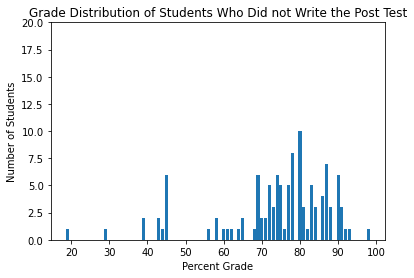

In [22]:
#na_free = df.dropna()
#only_na = df[~df.index.isin(na_free.index)]

pre_dropped = df21_111[~df21_111.index.isin(df_pre_f.index)]
print(pre_dropped.shape)

post_dropped = df21_111[~df21_111.index.isin(df_post_f.index)]
print(post_dropped.shape)

plt.bar(post_dropped["Percent Grade"].value_counts().index, post_dropped["Percent Grade"].value_counts())
plt.title("Grade Distribution of Students Who Did not Write the Post Test")
plt.xlabel("Percent Grade")
plt.ylabel("Number of Students")
plt.ylim(0,20)

(0.0, 20.0)

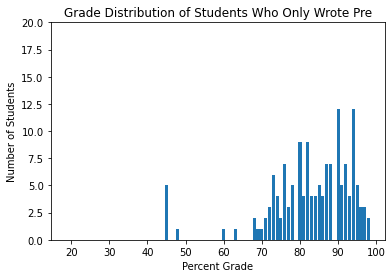

In [23]:
diff = (df21_111["Percent Grade"].value_counts() - post_dropped["Percent Grade"].value_counts())

diff[48] = df21_111["Percent Grade"].value_counts()[48]
diff[63] = df21_111["Percent Grade"].value_counts()[63]
diff[85] = df21_111['Percent Grade'].value_counts()[85]
diff[94] = df21_111["Percent Grade"].value_counts()[94]
diff[95] = df21_111["Percent Grade"].value_counts()[95]
diff[96] = df21_111['Percent Grade'].value_counts()[96]
diff[97] = df21_111['Percent Grade'].value_counts()[97]

plt.bar(diff.index, diff)
plt.title("Grade Distribution of Students Who Only Wrote Pre")
plt.xlabel("Percent Grade")
plt.ylabel("Number of Students")
plt.ylim(0,20)


(0.0, 20.0)

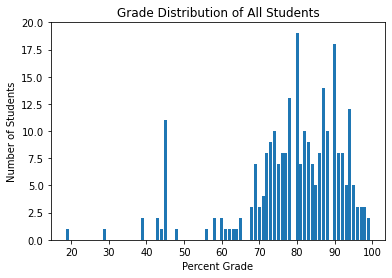

In [24]:
plt.bar(df21_111["Percent Grade"].value_counts().index, df21_111["Percent Grade"].value_counts())
plt.title("Grade Distribution of All Students")
plt.xlabel("Percent Grade")
plt.ylabel("Number of Students")
plt.ylim(0,20)

In [25]:
def by_gender_by_year_2021_no_cross_drop(df, name):
    
    avg_grade = df["Percent Grade"].mean()
    avg_grade_error = df['Percent Grade'].sem()
    
    pre = []
    for i in range (1,31):
        string = "PRE Q" + str(i)
        pre.append(string)
    post = []
    for i in range (1,31):
        string = "POST Q" + str(i)
        post.append(string)

    pre_2020 = ['PRE Q1'] 
    for i in range (24, 53):
        string = 'PRE Q' + str(i)
        pre_2020.append(string)

    post_2020 = ['POST Q1'] 
    for i in range (35, 64):
        string = 'POST Q' + str(i)
        post_2020.append(string)

    is_f = df['PRE Q12']== 1
    df_f = df[is_f]
    
    avg_grade_f = df_f['Percent Grade'].mean()
    avg_grade_f_error = df_f['Percent Grade'].sem()
    
    df_pre_f = df_f[pre_2020]
    df_post_f = df_f[post_2020]

    df_pre_f.columns = pre
    df_post_f.columns = post
    
    df_pre_f = df_pre_f.dropna(thresh=25, axis=0)
    df_post_f = df_post_f.dropna(thresh=25, axis=0)
    
    num_f = 1

    pre_f = df_pre_f.apply(calculate_pre_score_2021, axis=1).mean()
    pre_f_error = df_pre_f.apply(calculate_pre_score_2021, axis=1).sem(axis=0)
    post_f =df_post_f.apply(calculate_post_score_2021, axis=1).mean()
    post_f_error = df_post_f.apply(calculate_post_score_2021, axis=1).sem(axis=0)
    gain_f = (df_pre_f.apply(calculate_pre_score_2021, axis=1) - df_post_f.apply(calculate_post_score_2021, axis=1)).mean()
    norm_f = (post_f-pre_f)/(30-pre_f)
    norm_gain_error = (((df_pre_f.apply(calculate_pre_score_2021, axis=1) - df_post_f.apply(calculate_post_score_2021, axis=1)))/(30-(df_pre_f.apply(calculate_pre_score_2021, axis=1)))).sem(axis=0)
    gain_f_error = (df_pre_f.apply(calculate_pre_score_2021, axis=1) - df_post_f.apply(calculate_post_score_2021, axis=1)).sem(axis=0)
    gain_f_error_1 = np.sqrt(pre_f_error**2 + post_f_error**2)

    is_m = df['PRE Q12']== 3
    df_m = df[is_m]
    
    avg_grade_m = df_m['Percent Grade'].mean()
    avg_grade_m_error = df_m['Percent Grade'].sem()
    
    df_pre_m = df_m[pre_2020]
    df_post_m = df_m[post_2020]

    df_pre_m.columns = pre
    df_post_m.columns = post
    
    df_pre_m = df_pre_m.dropna(thresh=25, axis=0)
    df_post_m = df_post_m.dropna(thresh=25, axis=0)
    
    num_m = 1

    pre_m = df_pre_m.apply(calculate_pre_score_2021, axis=1).mean()
    pre_m_error = df_pre_m.apply(calculate_pre_score_2021, axis=1).sem(axis=0)
    post_m =df_post_m.apply(calculate_post_score_2021, axis=1).mean()
    post_m_error = df_post_m.apply(calculate_post_score_2021, axis=1).sem(axis=0)
    gain_m = (df_pre_m.apply(calculate_pre_score_2021, axis=1) - df_post_m.apply(calculate_post_score_2021, axis=1)).mean()
    norm_m = (post_m-pre_m)/(30-pre_m)
    norm_m_error = (((df_pre_m.apply(calculate_pre_score_2021, axis=1) - df_post_m.apply(calculate_post_score_2021, axis=1)))/(30-(df_pre_m.apply(calculate_pre_score_2021, axis=1)))).sem(axis=0)
    gain_m_error = (df_pre_m.apply(calculate_pre_score_2021, axis=1) - df_post_m.apply(calculate_post_score_2021, axis=1)).sem(axis=0)
    gain_m_error_1 = np.sqrt(pre_m_error**2 + post_m_error**2)
    
    num = num_f + num_m

    array = [name, avg_grade, avg_grade_error, pre_f, pre_f_error, post_f, post_f_error, post_f-pre_f, norm_f, norm_gain_error, gain_f_error, gain_f_error_1, num_f, avg_grade_f, avg_grade_f_error, pre_m, pre_m_error, post_m, post_m_error, post_m-pre_m, norm_m, norm_m_error, gain_m_error, gain_m_error_1, num_m, avg_grade_m, avg_grade_m_error]
    return array

In [26]:
column_names=["YEAR", "Avg Grade", "Avg Grade Error", "Pre Score F", "Pre Score F Error", "Post Score F","Post Score F Error", "Gain F", "Norm Gain", "Norm Gain Error", "Gain Error sqrt","Gain Error", "Num F", "Avg Grade F", "Avg Grade F error", "Pre Score M", "Pre Score M Error", "Post Score M", "Post Score M Error", "Gain M", "Norm gain M", "Norm gain error", "Gain M Error", "Gain M error sqrt", "Num M", "Avg M Grade", "Avg M grade error"]
df1  = pd.DataFrame(columns=column_names)
df1.loc[1] = by_gender_by_year_2021_no_cross_drop(df21_111, "2021 111 no cross drop")
df1.loc[2] = by_gender_by_year_2021(df21_111, "2021 111")
df1.loc[3] = by_gender_by_year_2021_no_cross_drop(post_dropped, "2021 111 post dropped")
df1
df1.transpose()

,1,2,3
YEAR,2021 111 no cross drop,2021 111,2021 111 post dropped
Avg Grade,79.18797,79.18797,73.921053
Avg Grade Error,0.835944,0.835944,1.384768
Pre Score F,11.814286,11.022727,13.153846
Pre Score F Error,0.766615,1.018065,1.111745
Post Score F,12.931818,12.931818,POST Q1 NaN POST Q2 NaN POST Q3 NaN P...
Post Score F Error,1.066696,1.066696,POST Q1 NaN POST Q2 NaN POST Q3 NaN P...
Gain F,1.117532,1.909091,POST Q1 NaN POST Q2 NaN POST Q3 NaN P...
Norm Gain,0.061451,0.100599,POST Q1 NaN POST Q2 NaN POST Q3 NaN P...
Norm Gain Error,0.163212,0.163212,22 NaN 54 NaN 56 NaN 6...


In [27]:
no_post = df21_111['POST Q10']== np.nan
df_nopost = df21_111[no_post]


by_gender_by_year_2021(df_nopost, "No Post Test 2021")

['No Post Test 2021',
 nan,
 nan,
 PRE Q1    NaN
 PRE Q2    NaN
 PRE Q3    NaN
 PRE Q4    NaN
 PRE Q5    NaN
 PRE Q6    NaN
 PRE Q7    NaN
 PRE Q8    NaN
 PRE Q9    NaN
 PRE Q10   NaN
 PRE Q11   NaN
 PRE Q12   NaN
 PRE Q13   NaN
 PRE Q14   NaN
 PRE Q15   NaN
 PRE Q16   NaN
 PRE Q17   NaN
 PRE Q18   NaN
 PRE Q19   NaN
 PRE Q20   NaN
 PRE Q21   NaN
 PRE Q22   NaN
 PRE Q23   NaN
 PRE Q24   NaN
 PRE Q25   NaN
 PRE Q26   NaN
 PRE Q27   NaN
 PRE Q28   NaN
 PRE Q29   NaN
 PRE Q30   NaN
 dtype: float64,
 PRE Q1    NaN
 PRE Q2    NaN
 PRE Q3    NaN
 PRE Q4    NaN
 PRE Q5    NaN
 PRE Q6    NaN
 PRE Q7    NaN
 PRE Q8    NaN
 PRE Q9    NaN
 PRE Q10   NaN
 PRE Q11   NaN
 PRE Q12   NaN
 PRE Q13   NaN
 PRE Q14   NaN
 PRE Q15   NaN
 PRE Q16   NaN
 PRE Q17   NaN
 PRE Q18   NaN
 PRE Q19   NaN
 PRE Q20   NaN
 PRE Q21   NaN
 PRE Q22   NaN
 PRE Q23   NaN
 PRE Q24   NaN
 PRE Q25   NaN
 PRE Q26   NaN
 PRE Q27   NaN
 PRE Q28   NaN
 PRE Q29   NaN
 PRE Q30   NaN
 dtype: float64,
 POST Q1    NaN
 POST Q2    NaN
